# Machine Learning Classifier
## Breast Cancer Tumor
In this example, we'll build a ML classifier to predict weather or not a tumor is malignant or benign.

In [29]:
import sklearn
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [22]:
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

df = pd.DataFrame(data['target_names'])
df.head()

0
0  malignant
1     benign

In [34]:
#print(label_names)
#print(labels)
#print(features)
print(feature_names)

df = pd.DataFrame(features, columns = feature_names)
df['benign'] = labels
df.head()


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  benign  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

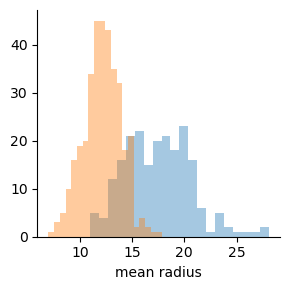

In [60]:
grid = sns.FacetGrid(df, hue = 'benign')
grid.map(plt.hist, 'mean radius', bins = 20, alpha = 0.4)

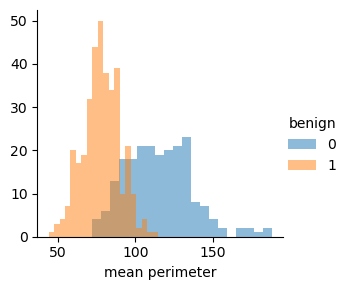

In [61]:
grid = sns.FacetGrid(df, hue = 'benign')
grid.map(plt.hist, 'mean perimeter', bins = 20, alpha = 0.5)
grid.add_legend()

### Dividing data into sets

In [10]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.33, random_state = 42)


### Building and evaluating the model

In [11]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model = gnb.fit(train, train_labels)

#### Making predictions

In [13]:
pred = gnb.predict(test)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 1]


#### Evaluating model

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, pred))

0.9414893617021277
